In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from statsmodels.distributions.empirical_distribution import ECDF
import pickle
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib as mpl

51.55555555555556


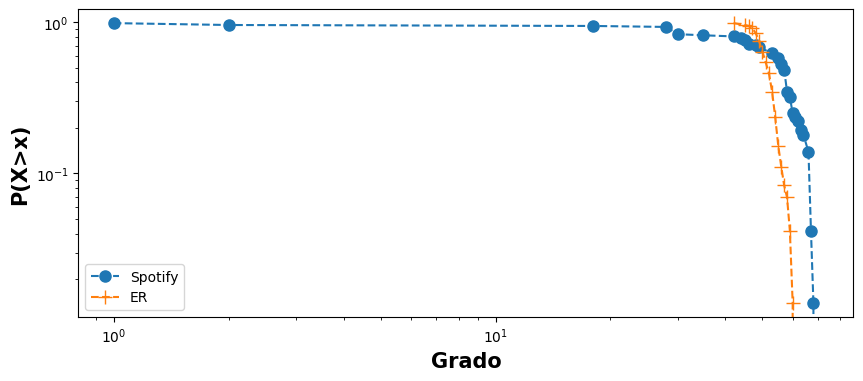

52.416666666666664


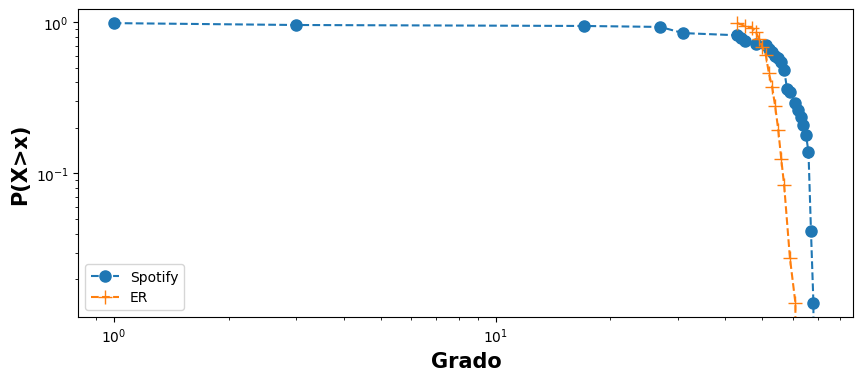

50.80555555555556


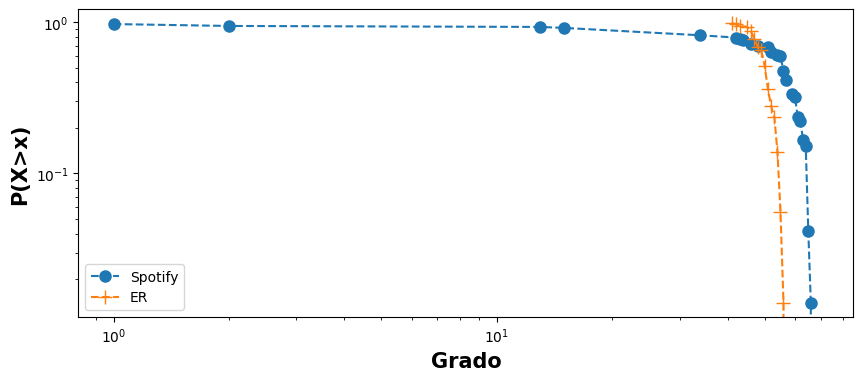

49.888888888888886


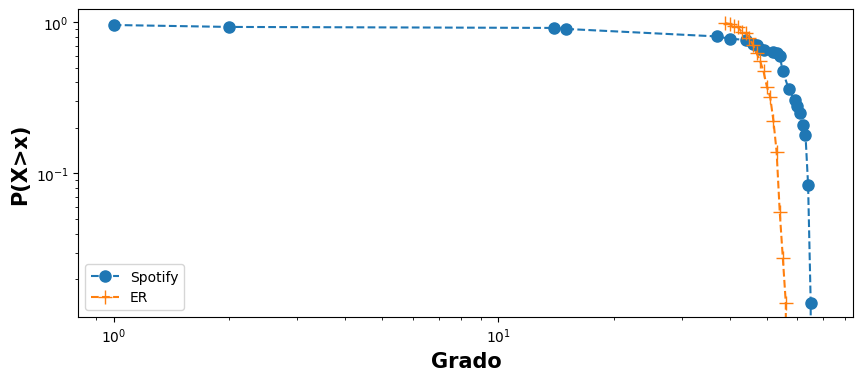

51.80555555555556


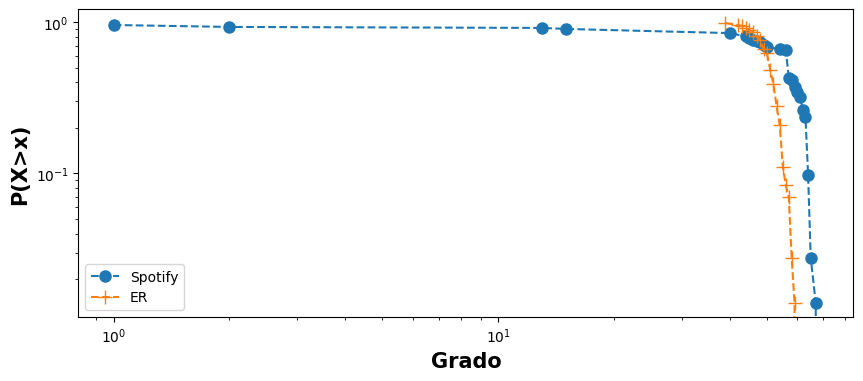

57.19444444444444


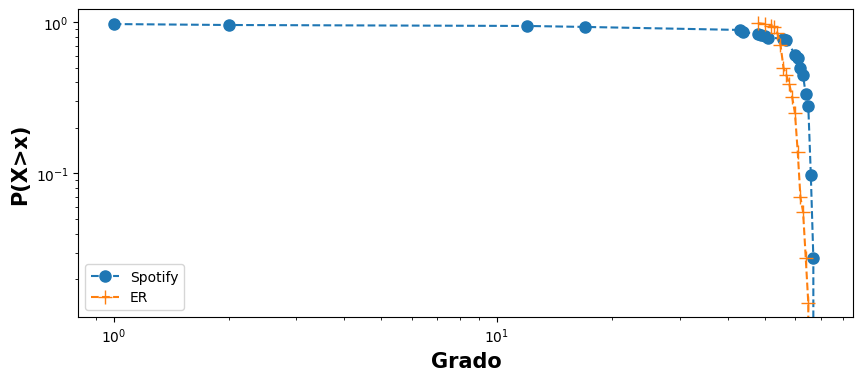

57.361111111111114


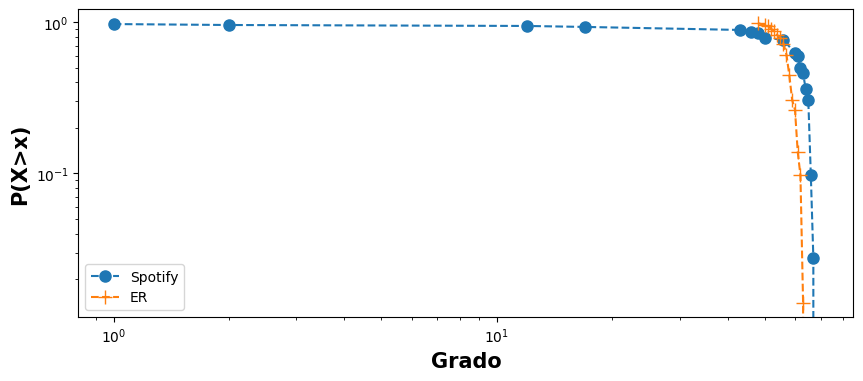

57.166666666666664


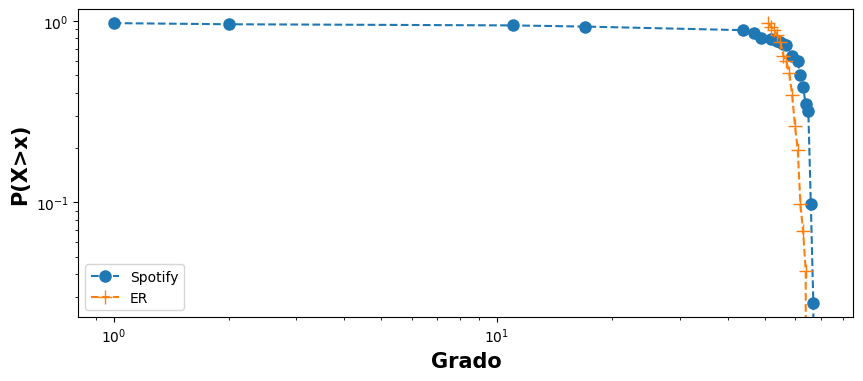

65.13888888888889


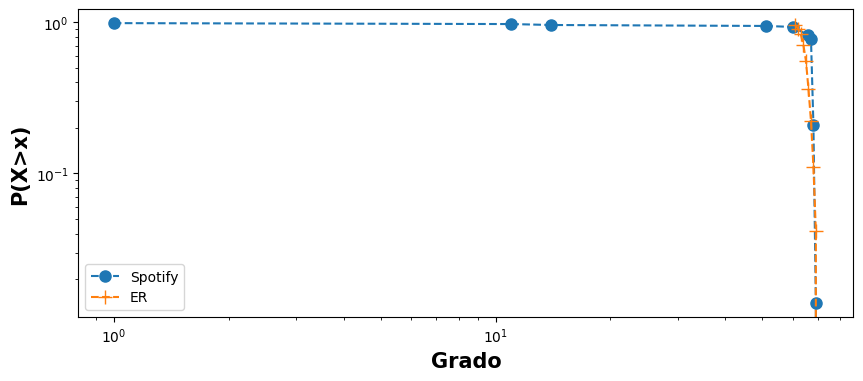

60.166666666666664


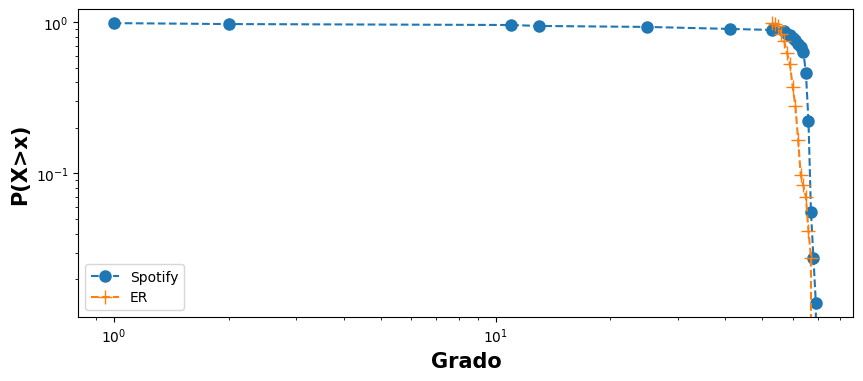

60.166666666666664


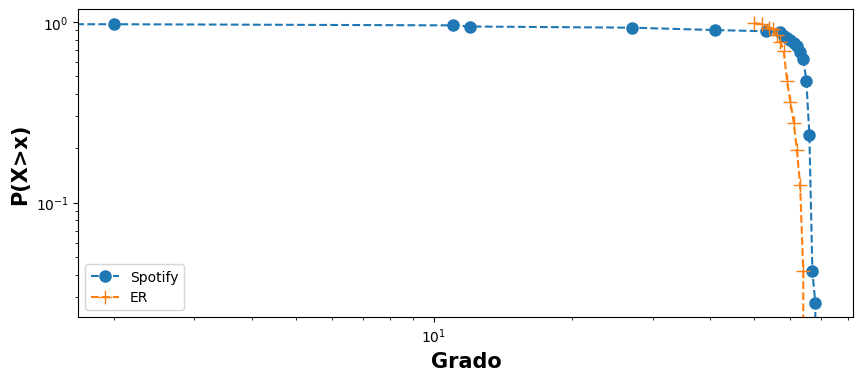

60.861111111111114


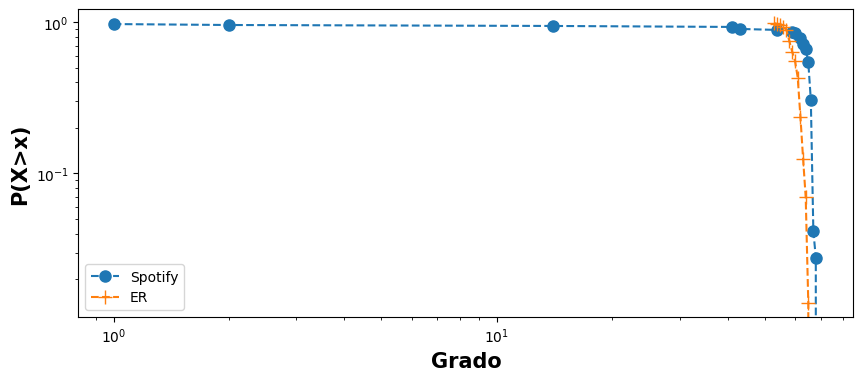

61.083333333333336


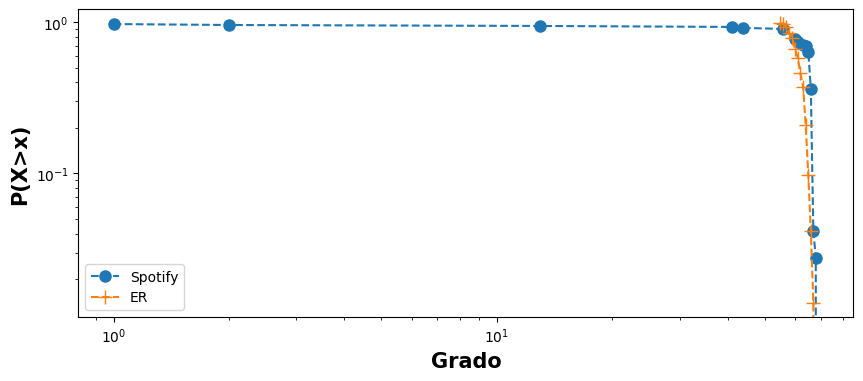

60.138888888888886


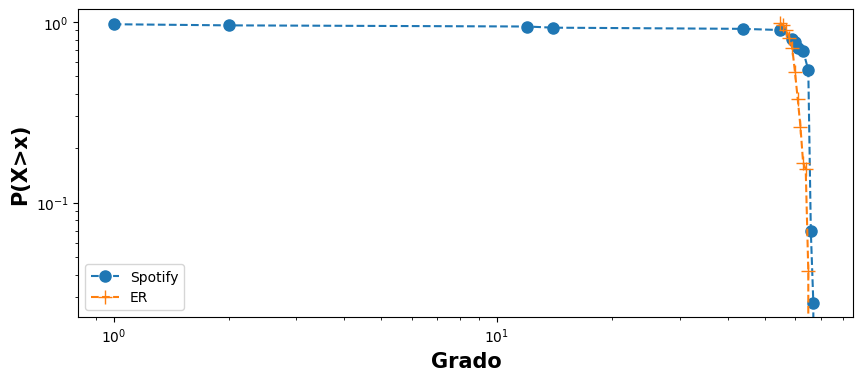

54.52777777777778


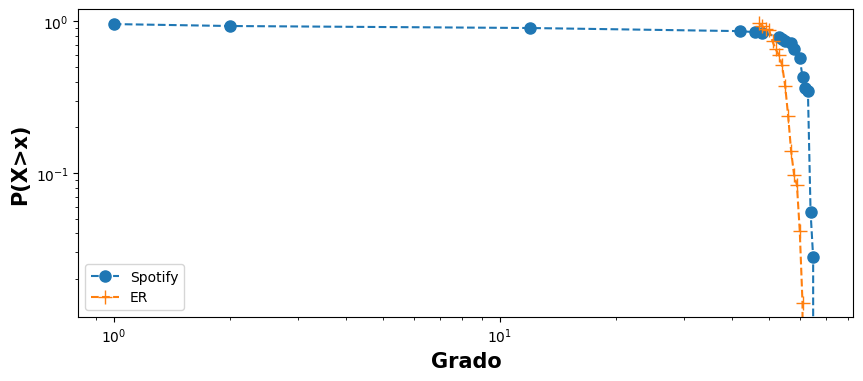

'\nfor z in range(1,16):\n    with open(f\'global{z}.pkl\', \'rb\') as f:\n        grafo = pickle.load(f)\n        randomNW = nx.erdos_renyi_graph(grafo.order(), nx.density(grafo))\n        cdf = ECDF(list(dict(grafo.degree()).values()))\n        x = np.unique(list(dict(grafo.degree()).values()))\n        y = cdf(x)\n\n        cdf_random = ECDF(list(dict(randomNW.degree()).values()))\n        x_random = np.unique(list(dict(randomNW.degree()).values()))\n        y_random = cdf_random(x_random)\n\n        fig_cdf_fb = plt.figure(figsize=(10,4))\n        axes = fig_cdf_fb.gca()\n        axes.set_xscale(\'log\')\n        #axes.set_yscale(\'log\')\n        axes.loglog(x,y,marker=\'o\',ms=8, linestyle=\'--\', label = \'Spotify\')\n        axes.loglog(x_random,y_random,marker=\'+\',ms=10, linestyle=\'--\', label = \'ER\')\n        axes.set_xlabel(\'Grado\',size=15, weight = \'bold\')\n        axes.set_ylabel(\'P(X<=x)\',size=15, weight = \'bold\')\n\n        plt.legend()\n        plt.show()\n

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.font_manager as fm
from statsmodels.distributions.empirical_distribution import ECDF
import networkx as nx

import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF



giorno = 10
for z in range(1, 16):
    if z == 9:
        giorno += 1
    with open(f'global{z}.pkl', 'rb') as f:
    #with open(f'viral{z}.pkl', 'rb') as f:
        grafo = pickle.load(f)
        degree = dict(grafo.degree(weight='weight'))
        campione_degree = list(degree.values())
        
        min_t = min(campione_degree)
        max_t = max(campione_degree)

        count_rete, bins_rete = np.histogram(campione_degree, bins=np.arange(min_t, max_t+2))

        pdf_rete = count_rete / grafo.order()

        cdf_fb = ECDF(campione_degree)
        x = np.unique(campione_degree)
        y = cdf_fb(x)

        # Visualizzazione
        fig_cdf_function = plt.figure(figsize=(21, 9))
        fig_cdf_function.set_facecolor('#1c1e21')
        assi = fig_cdf_function.gca()
        assi.set_facecolor('#1c1e21')

        fpath = os.path.join(mpl.get_data_path(), "fonts/ttf/DejaVuSerif.ttf")
        prop = fm.FontProperties(fname=fpath)
        fname = os.path.split(fpath)[1]

        assi.set_xlabel('X-axis')
        assi.set_ylabel('Y-axis')

        assi.spines['left'].set_color('white')
        assi.spines['right'].set_color('white')
        assi.spines['top'].set_color('white')
        assi.spines['bottom'].set_color('white')
        assi.tick_params(colors='white', which='both')

        assi.plot(x, y, color='blue', linestyle='--', marker='o', ms=16)
        plt.title(f'Top {giorno+z} aprile', fontproperties=prop, size=30, color='white')
        # plt.title(f'Viral {giorno+z} aprile', fontproperties=prop, size=30, color='#00d95a')
        assi.set_xlabel('Grado', fontproperties=prop, size=30, color='white')
        assi.set_ylabel('ECDF', fontproperties=prop, size=30, color='white')
        assi.set_xticks(range(0,1300,50),range(0,1300,50),size = 12, rotation = 90)

        #plt.savefig(f'global_ECDF{z}.png')
        # plt.savefig(f'viral_ECDF{z}.png')
        cdf_function = ECDF(degree_list)
        
        cdf_function = ECDF(campione_degree)
        x = np.unique(campione_degree)
        y = cdf_function(x)

        # Visualizzazione
        fig_cdf_function = plt.figure(figsize=(8,4))
        assi = fig_cdf_function.gca()
        #assi.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
        assi.plot(x,y,color = 'blue', linestyle = '--', marker= 'o',ms = 5)
        assi.set_xlabel('Grado',size=15, weight = 'bold')
        assi.set_ylabel('ECDF',size=15, weight = 'bold')
        assi.set_xticks(range(0,1350,50),range(0,1350,50),size = 12, rotation = 90)
        plt.title(f'Global {giorno+z} aprile', fontproperties=prop, size=15, color='blue')
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'global_ECDF{z}.png')
        #plt.savefig(f'viral_ECDF{z}.png')
'''